In [61]:
####读取数据
import pandas as pd
import numpy as np
data = pd.read_csv('ppData.csv')
file = open("身份证前六位对照表.txt",encoding='utf-8')
file_list = []
while 1:
    line = file.readline()
    if not line:
        break
    file_list.append(line.split(' '))
id_code = [ele[0] for ele in  file_list]
id_addr = [ele[1].split('\n')[0] for ele in  file_list]
id_dict = dict(zip(id_code,id_addr))

###选取所需要字段
use_col = ['beginOverdueTime','hasCollectionDesc',
       'idcardno', 'isLoss', 'name', 'overdue', 'phoneNo', 'platFormName',
       'province', 'totalLoanAmount']
use_col_chinese = ['开始逾期日期','是否催收','身份证号码','是否失联','姓名','逾期金额',
                   '手机号码','借贷平台','区域/城市','借贷金额']
data_use = data[use_col]
data_use.columns = use_col_chinese

In [63]:
data_use.head()

,开始逾期日期,是否催收,身份证号码,是否失联,姓名,逾期金额,手机号码,借贷平台,区域/城市,借贷金额
0,2017/8/26,已催收,50024119931224****,否,杨*菊,16859.46,1581728****,宜人贷,重庆,32900.00
1,2017/1/31,已催收,51343219891008****,否,周*,10247.13,1373492****,宜信惠民,四川省,42223.79
2,2017/11/19,已催收,44023219771102****,否,杨*来,158015.57,1787510****,宜人贷,广东省,169972.00
3,2018/1/26,已催收,44152219830524****,否,蔡*勇,21279.57,1355360****,宜信惠民,广东省,46082.95
4,2016/9/17,已催收,33080219821129****,否,朱*,85879.45,1375702****,宜人贷,浙江省,126400.00


In [65]:
data_use.shape

(120691, 10)

In [66]:
###解析身份证前六位 地址编码
def deal_id1(x):
    try:
        return id_dict[x['身份证号码'][:2]+'0000']
    except BaseException:
        return '空'
def deal_id2(x):
    try:
        return id_dict[x['身份证号码'][:4]+'00']
    except BaseException:
        return '空'
def deal_id3(x):
    try:
        return id_dict[x['身份证号码'][:6]]
    except BaseException:
        return '空'
data_use['一级地址'] = data_use.apply(lambda x:deal_id1(x),axis =1)
data_use['二级地址'] = data_use.apply(lambda x:deal_id2(x),axis =1)
data_use['三级地址'] = data_use.apply(lambda x:deal_id3(x),axis =1)

D:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [67]:
data_use.head()

,开始逾期日期,是否催收,身份证号码,是否失联,姓名,逾期金额,手机号码,借贷平台,区域/城市,借贷金额,一级地址,二级地址,三级地址
0,2017/8/26,已催收,50024119931224****,否,杨*菊,16859.46,1581728****,宜人贷,重庆,32900.00,重庆市,县,秀山土家族苗族自治县
1,2017/1/31,已催收,51343219891008****,否,周*,10247.13,1373492****,宜信惠民,四川省,42223.79,四川省,凉山彝族自治州,喜德县
2,2017/11/19,已催收,44023219771102****,否,杨*来,158015.57,1787510****,宜人贷,广东省,169972.00,广东省,韶关市,乳源瑶族自治县
3,2018/1/26,已催收,44152219830524****,否,蔡*勇,21279.57,1355360****,宜信惠民,广东省,46082.95,广东省,汕尾市,空
4,2016/9/17,已催收,33080219821129****,否,朱*,85879.45,1375702****,宜人贷,浙江省,126400.00,浙江省,衢州市,柯城区


In [6]:
def judge_ifCompay(x):
    if x['一级地址'] == '空'or len(x['身份证号码'])!=18:
        return '是'
    elif x['一级地址'] != '空' and len(x['身份证号码'])==18:
        return '否'
    else:
        return '未知'
data_use['是否企业'] = data_use.apply(lambda x:judge_ifCompay(x),axis = 1)
data_company = data_use[data_use['是否企业']=='是']
data_person = data_use[data_use['是否企业']=='否']

In [68]:
data_person.shape

(120545, 16)

In [52]:
data_person.describe()

,逾期金额,借贷金额,年龄
count,1.205450e+05,1.205450e+05,120545.000000
mean,3.371900e+04,5.261792e+04,37.631300
std,5.574667e+04,1.083028e+05,9.376123
min,2.500000e+01,5.000000e+02,20.000000
25%,7.543620e+03,2.190000e+04,30.000000
50%,2.456422e+04,4.540000e+04,35.000000
75%,4.775595e+04,7.020000e+04,44.000000
max,8.000000e+06,1.693148e+07,75.000000


In [69]:
###解析年龄 
def deal_age(x):
    try:
        tmp = 2019-int(x['身份证号码'][6:10])
        return tmp if (tmp>0 and tmp<100) else 30
    except BaseException:
        print(x['身份证号码'])
        return 2019-int('19'+x['身份证号码'][8:10])
data_person['年龄'] = data_person.apply(lambda x:deal_age(x),axis=1)
#年龄与逾期人数
data_age = data_person.groupby(['年龄']).apply(lambda x:x['身份证号码'].count()).reset_index(name = '人数')
#年龄与逾期总金额
sum_age = data_person.groupby(['年龄']).apply(lambda x:x['逾期金额'].sum()).reset_index(name = '逾期总金额')
#年龄与借贷总金额
sumload_age = data_person.groupby(['年龄']).apply(lambda x:x['借贷金额'].sum()).reset_index(name = '借贷总金额')

4202****861115****


D:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


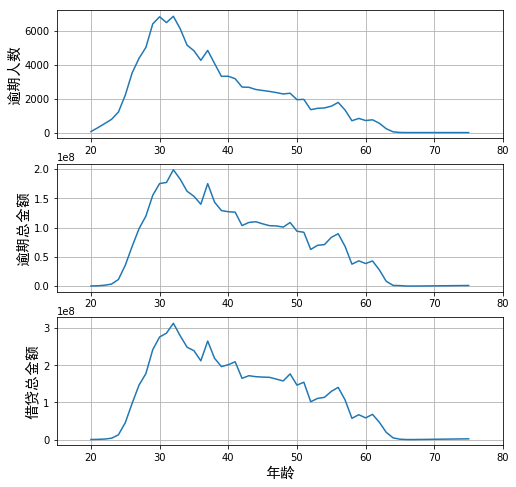

In [19]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname = "./chinese.simhei.ttf",size=15)
fig,axs = plt.subplots(3,1)

axs[0].plot(data_age['年龄'],data_age['人数'])
axs[0].set_xlim(15, 80)
#axs[0].set_xlabel('年龄')
axs[0].set_ylabel('逾期人数',fontproperties = font)
axs[0].grid(True)

axs[1].plot(sum_age['年龄'],sum_age['逾期总金额'])
axs[1].set_xlim(15, 80)
#axs[1].set_xlabel('年龄')
axs[1].set_ylabel('逾期总金额',fontproperties = font)
axs[1].grid(True)

axs[2].plot(sumload_age['年龄'],sumload_age['借贷总金额'])
axs[2].set_xlim(15, 80)
axs[2].set_xlabel('年龄',fontproperties = font)
axs[2].set_ylabel('借贷总金额',fontproperties = font)
axs[2].grid(True)
plt.savefig('年龄_人数_逾期金额_借贷总金额.jpg')
plt.show()

In [21]:
###各个省市的未逾期总金额和逾期总金额
addr_num = data_person.groupby(['一级地址']).apply(lambda x:x['身份证号码'].count()).reset_index(name = '人数').sort_values(by=['人数'])
addr_sum_overdue = data_person.groupby(['一级地址']).apply(lambda x:x['逾期金额'].sum()).reset_index(name = '逾期总金额')
addr_sum_un_overdue = data_person.groupby(['一级地址']).apply(lambda x:x['借贷金额'].sum()-x['逾期金额'].sum()).reset_index(name = '未逾期总金额')
addr_sum_temp = addr_num.merge(addr_sum_overdue,how = 'left')
addr_sum_temp = addr_sum_temp.merge(addr_sum_un_overdue,how = 'left')
addr_sum_temp['借贷总金额'] = addr_sum_temp.apply(lambda x:x['逾期总金额']+x['未逾期总金额'],axis = 1)
addr_sum_temp['占比'] = addr_sum_temp.apply(lambda x:x['逾期总金额']/(x['逾期总金额']+x['未逾期总金额']),axis = 1)
addr_sum_temp = addr_sum_temp.sort_values(by=['借贷总金额'])

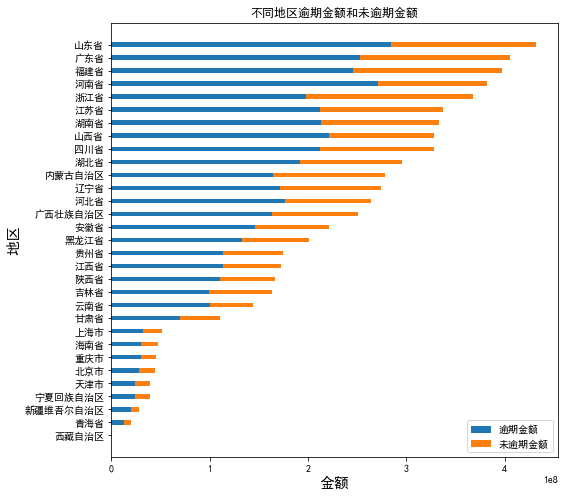

In [26]:
plt.rcParams['font.sans-serif'] = ['SimHei']
N = addr_sum_temp.shape[0]
menMeans = addr_sum_temp['逾期总金额'].values
womenMeans = addr_sum_temp['未逾期总金额'].values
ind = np.arange(N)
width = 0.35
plt.rcParams['figure.figsize'] = (8, 8.0)
p1 = plt.barh(ind, menMeans, width)
p2 = plt.barh(ind, womenMeans, width,left = menMeans)
plt.xlabel('金额',fontproperties = font)
plt.ylabel('地区',fontproperties = font)
plt.title('不同地区逾期金额和未逾期金额')
plt.yticks(ind, addr_sum_temp['一级地址'].values)
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('逾期金额', '未逾期金额'))
plt.savefig('地区_逾期_未逾期柱状图.jpg')
plt.show()

In [70]:
addr_sum_temp.sort_values(by = ['占比'],ascending = False)

,一级地址,人数,逾期总金额,未逾期总金额,借贷总金额,占比
27,河南省,7765,2.713286e+08,1.107479e+08,3.820765e+08,0.710142
2,新疆维吾尔自治区,417,1.964492e+07,8.311611e+06,2.795653e+07,0.702695
12,云南省,3072,1.000897e+08,4.401055e+07,1.441003e+08,0.694584
20,山西省,5296,2.217155e+08,1.066517e+08,3.283672e+08,0.675206
19,河北省,4921,1.770402e+08,8.702461e+07,2.640648e+08,0.670442
14,黑龙江省,3562,1.325953e+08,6.802053e+07,2.006158e+08,0.660941
13,陕西省,3307,1.100807e+08,5.668189e+07,1.667626e+08,0.660104
28,山东省,7946,2.844594e+08,1.476157e+08,4.320751e+08,0.658356
18,安徽省,4663,1.457809e+08,7.575930e+07,2.215402e+08,0.658034
16,江西省,3754,1.133529e+08,5.902474e+07,1.723777e+08,0.657585


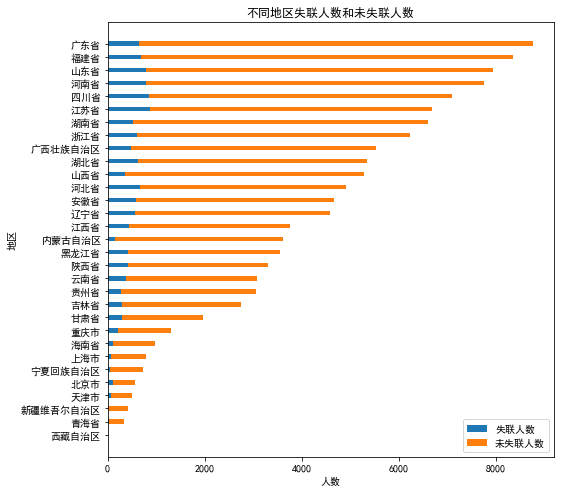

In [27]:
addr_num = data_person.groupby(['一级地址']).apply(lambda x:x['身份证号码'].count()).reset_index(name = '人数').sort_values(by=['人数'])
data_peson_loss = data_person[data_person['是否失联']=='是']
addr_num_loss = data_peson_loss.groupby(['一级地址']).apply(lambda x:x['身份证号码'].count()).reset_index(name = '失联人数')
addr_num = addr_num.merge(addr_num_loss,how = 'left').fillna(0)
addr_num['未失联人数'] = addr_num.apply(lambda x:x['人数']-x['失联人数'],axis=1)
addr_num['失联占比'] = addr_num.apply(lambda x:x['失联人数']/x['人数'],axis=1)

N = addr_num.shape[0]
menMeans = addr_num['失联人数'].values
womenMeans = addr_num['未失联人数'].values
ind = np.arange(N)
width = 0.35
plt.rcParams['figure.figsize'] = (8, 8.0)
p1 = plt.barh(ind, menMeans, width)
p2 = plt.barh(ind, womenMeans, width,left = menMeans)
plt.xlabel('人数')
plt.ylabel('地区')
plt.title('不同地区失联人数和未失联人数')
plt.yticks(ind, addr_num['一级地址'].values)
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('失联人数', '未失联人数'))
plt.savefig('地区_失联_未失联.jpg')
plt.show()

In [28]:
addr_num.sort_values(by=['失联占比'],ascending= False)

,一级地址,人数,失联人数,未失联人数,失联占比
4,北京市,571,110.0,461.0,0.192644
8,重庆市,1310,224.0,1086.0,0.170992
3,天津市,510,77.0,433.0,0.150980
9,甘肃省,1975,296.0,1679.0,0.149873
19,河北省,4921,679.0,4242.0,0.137980
25,江苏省,6696,873.0,5823.0,0.130376
18,安徽省,4663,583.0,4080.0,0.125027
17,辽宁省,4592,574.0,4018.0,0.125000
13,陕西省,3307,412.0,2895.0,0.124584
12,云南省,3072,376.0,2696.0,0.122396


In [47]:
####逾期时间
ata_person1 = data_person[data_person['逾期年份'].values != ' 42,823.00 '] ##脏数据
data_person1['开始逾期日期'] = data_person1.apply(lambda x:x['开始逾期日期'].lstrip(),axis=1)
data_person1['开始逾期日期'] = data_person1.apply(lambda x:x['开始逾期日期'].replace('-','/'),axis=1)
data_person1['逾期年份'] = data_person1.apply(lambda x:x['开始逾期日期'].split('/')[0],axis=1)
data_person1 = data_person[data_person['逾期年份'].values != '42,823.00 ']
data_person1['逾期月份'] = data_person1.apply(lambda x:x['开始逾期日期'].split('/')[1],axis=1)
data_person1['逾期月份'] = data_person1.apply(lambda x:x['逾期月份'] if len(x['逾期月份'])==2 else '0'+x['逾期月份'],axis=1)
data_person1['逾期年月'] = data_person1.apply(lambda x:x['逾期年份']+x['逾期月份'],axis = 1)
time_data = data_person1.groupby(['逾期年月']).apply(lambda x:x['身份证号码'].count()).reset_index(name = '人数').sort_values(by=['逾期年月'])

D:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [45]:
time_data['逾期年份'].values

array(['2014', '2015', '2016', '2017', '2018', '2019'], dtype=object)

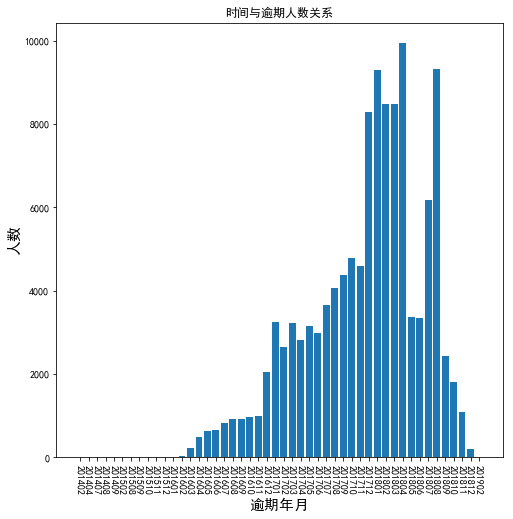

In [49]:
import pylab as pl
fig,ax = plt.subplots()
ax.bar(time_data['逾期年月'].values, time_data['人数'].values)
#plt.xticks()
plt.xlabel('逾期年月',fontproperties = font)
plt.ylabel('人数',fontproperties = font)
plt.title('时间与逾期人数关系')
plt.xticks([i for i in range(time_data['逾期年月'].shape[0])])
pl.xticks(rotation=270)
plt.savefig('时间_人数柱状图.jpg')
plt.show()